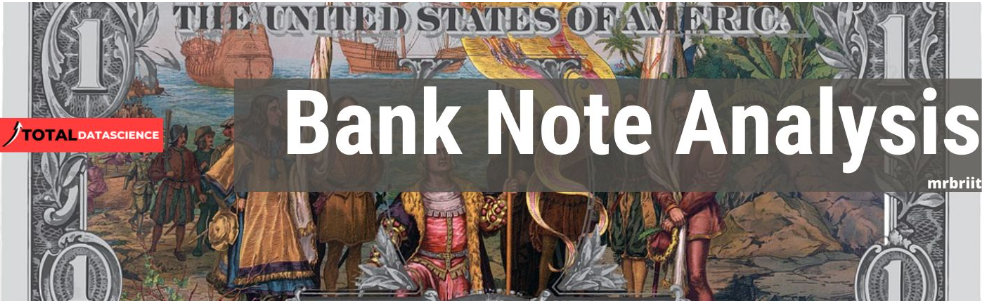

# Bank Note Analysis

<br>

### Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

### Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

**Dataset:** https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

**UCI:** http://archive.ics.uci.edu/ml/datasets/banknote+authentication

### **Can we classify banknote as fake or genuine?**

In [1]:
#!pip install pyforest

In [2]:
from pyforest import *

In [3]:
lazy_imports()

['from sklearn.model_selection import train_test_split',
 'from dask import dataframe as dd',
 'import xgboost as xgb',
 'import keras',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.model_selection import cross_val_score',
 'import bokeh',
 'import dash',
 'from pathlib import Path',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import statistics',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import tqdm',
 'from sklearn.manifold import TSNE',
 'from sklearn.preprocessing import RobustScaler',
 'import skimage',
 'from sklearn.cluster import KMeans',
 'import os',
 'from sklearn.preprocessing import LabelEncoder',
 'import pydot',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.preprocessing import OneHotEncoder',
 'import datetime as dt',
 'import spacy',
 'im

In [4]:
df = pd.read_csv("BankNote_Authentication.csv")

<IPython.core.display.Javascript object>

In [5]:
df.head()

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [6]:
df

variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

In [7]:
df.shape

(1372, 5)

In [8]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [9]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [10]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

<br>


### **Visualizations**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\frank\AppData\Local\Temp\ipykernel_3044\2779910848.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'], color='red')


<IPython.core.display.Javascript object>

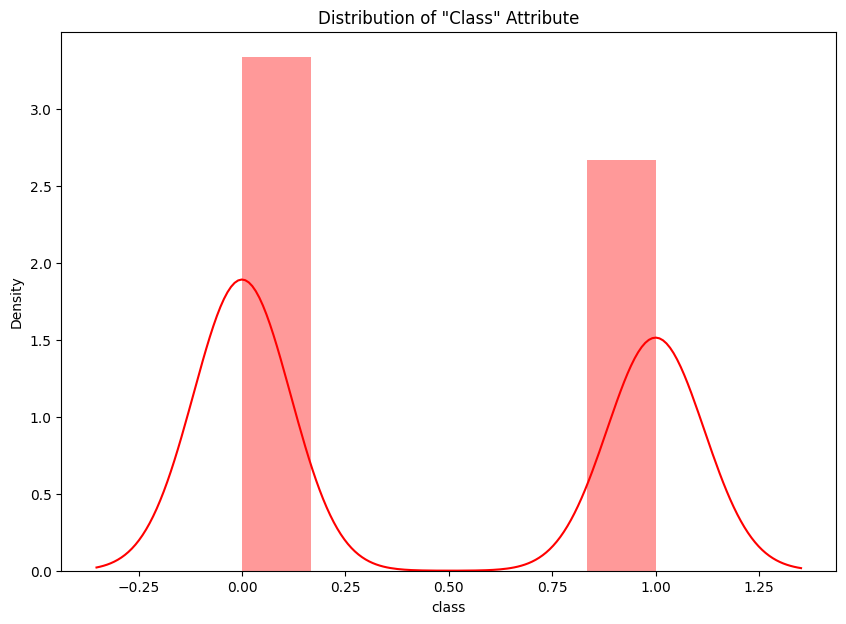

In [11]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Class" Attribute')
sns.distplot(df['class'], color='red')
plt.show()

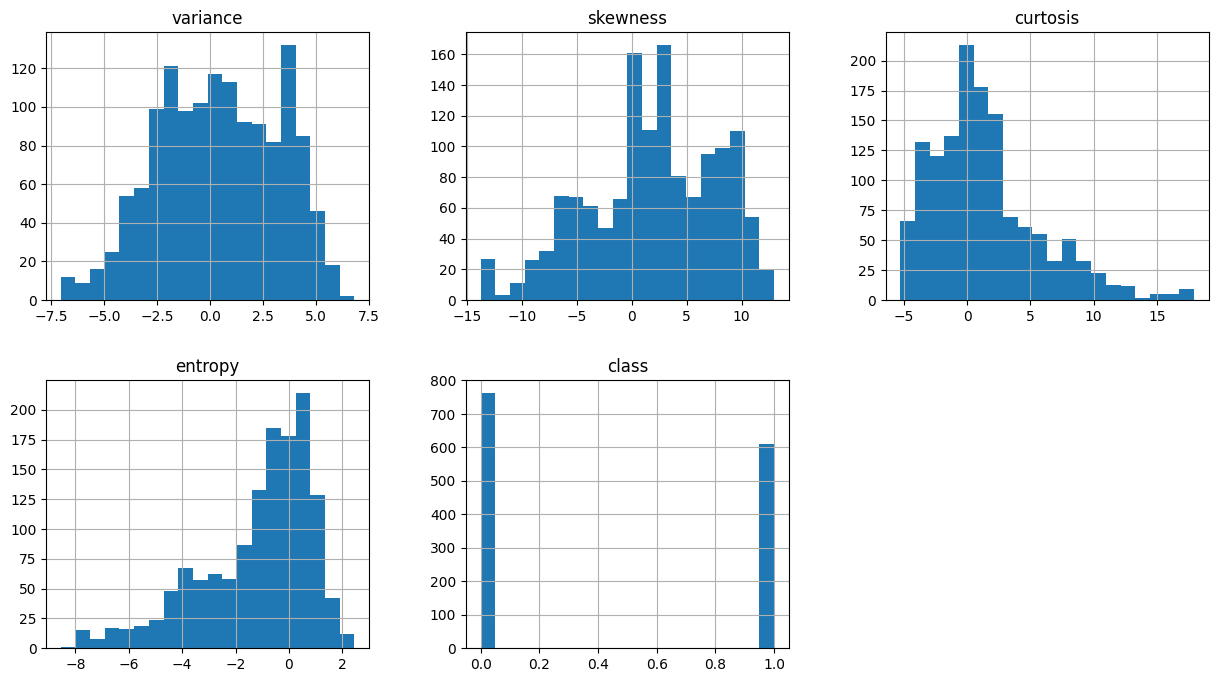

In [12]:
df.hist(bins=20, figsize=(15,8), layout=(2,3));

<IPython.core.display.Javascript object>

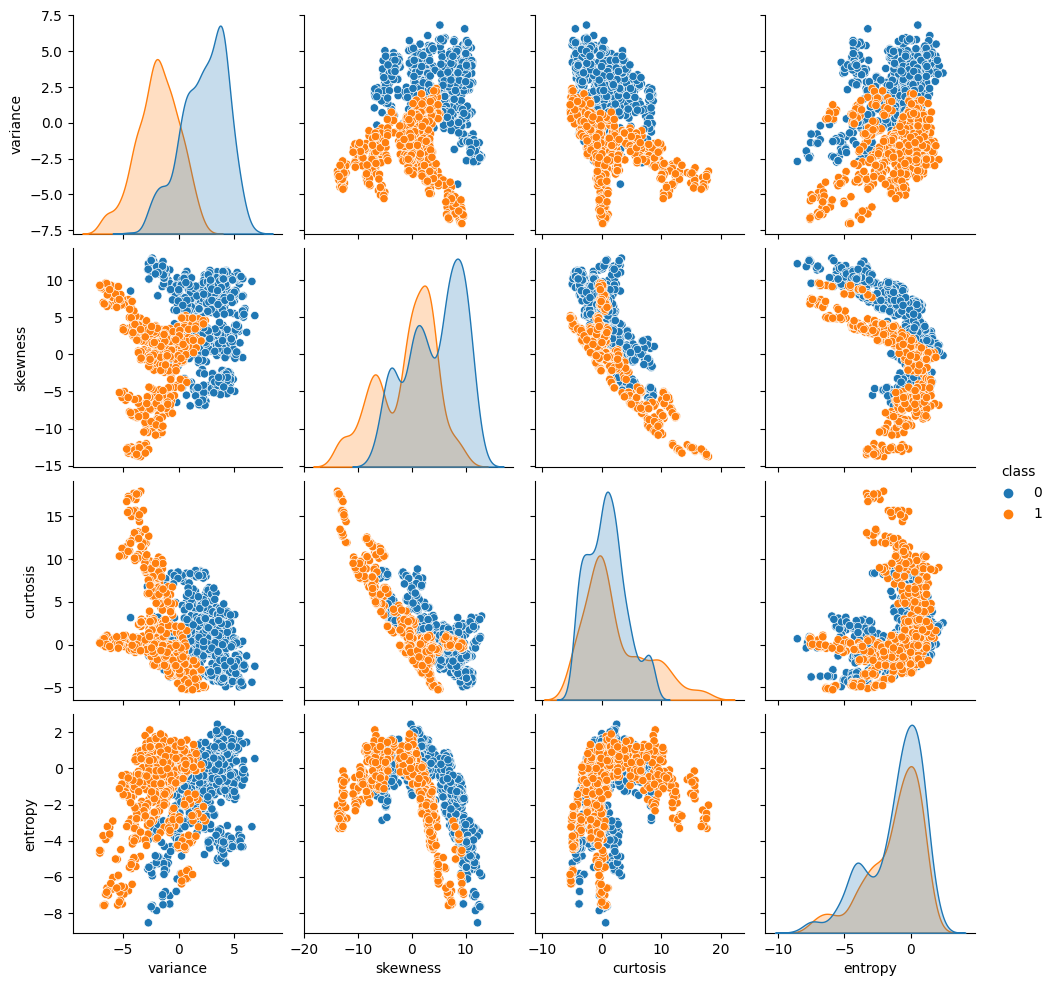

In [13]:
sns.pairplot(df, hue='class');

<br>

### **Preparing our Data To Build Our Model**

In [14]:
df.head()

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [15]:
X = df.drop('class', axis=1)
y = df['class']

In [16]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

<IPython.core.display.Javascript object>

In [17]:
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<IPython.core.display.Javascript object>

In [18]:
X_train

array([[-1.58438248,  0.1072115 , -0.14276339,  0.03334576],
       [-1.08829139, -2.53123321,  2.67783284, -0.35092979],
       [ 1.13672843, -0.15348755, -0.16820608,  0.86368769],
       ...,
       [-1.6900361 ,  0.72314447, -0.19588896, -2.05114485],
       [ 0.57766241,  0.02698182,  0.1851622 ,  0.52080477],
       [-0.9644631 ,  0.30908695, -0.49734797, -0.03521515]])

In [19]:
X_test

array([[-1.40564511, -0.03629527, -0.25946279, -0.55356298],
       [ 0.27456924,  0.39719812,  0.19050204,  0.69982149],
       [-1.56677623, -1.70567084,  2.36049857, -0.08188265],
       ...,
       [ 0.33303672,  0.90277959, -0.894603  ,  0.10774845],
       [ 0.24291663, -0.00314587, -0.98169159,  0.65423293],
       [ 0.44734548,  0.89770987, -0.5083209 , -0.56573811]])

<br>

## Logistic Regression

In [20]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [21]:
classifier = LogisticRegression(solver='liblinear', random_state=1)

classifier.fit(X_train, y_train)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train,cv=10)

print("Accuracies:\n",accuracies)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracies:
 [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [22]:
print("Mean Accuracy:", accuracies.mean())

Mean Accuracy: 0.9835863219349459


In [23]:
classifier_pred = classifier.predict(X_test)

In [24]:
classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot: >

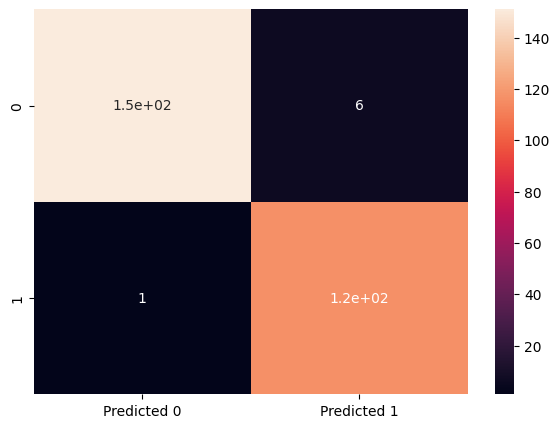

In [25]:
# from sklearn import metrics

cm = metrics.confusion_matrix(y_test, classifier_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in [0,1]], columns=[i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

In [26]:
from sklearn.svm import SVC

svm_classifier=SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)

svm_accuracies = cross_val_score(estimator=svm_classifier, X=X_train, y=y_train,cv=10)

print("Accuracies:\n",svm_accuracies)

<IPython.core.display.Javascript object>

Accuracies:
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [27]:
print("Mean Accuracy:", svm_accuracies.mean())

Mean Accuracy: 0.9854045037531277


In [28]:
svm_classifier_pred = svm_classifier.predict(X_test)

In [29]:
svm_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot: >

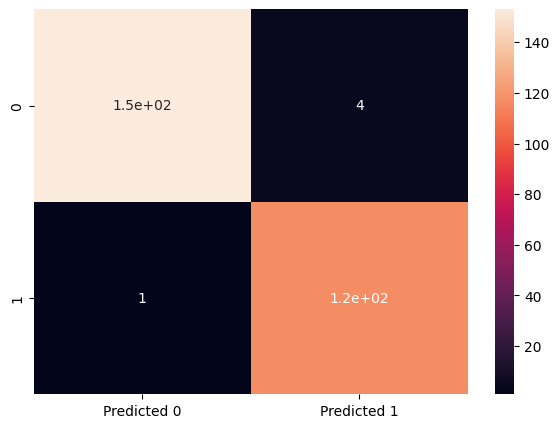

In [30]:
# from sklearn import metrics

cm = metrics.confusion_matrix(y_test, svm_classifier_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in [0,1]], columns=[i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

In [31]:

rbf_classifier=SVC(kernel='rbf')

rbf_classifier.fit(X_train, y_train)

rbf_accuracies = cross_val_score(estimator=rbf_classifier, X=X_train, y=y_train,cv=10)

print("Accuracies:\n",rbf_accuracies)

<IPython.core.display.Javascript object>

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [32]:
rbf_classifier_pred = rbf_classifier.predict(X_test)
rbf_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot: >

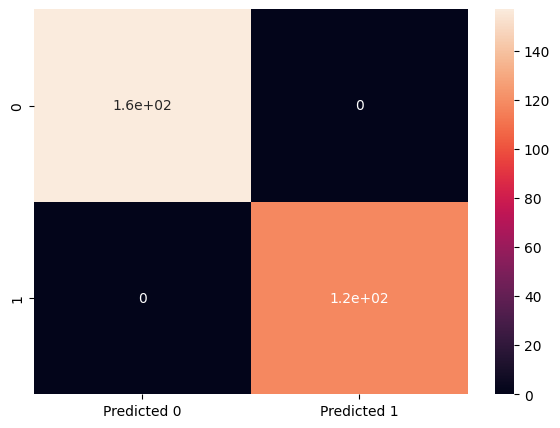

In [33]:
# from sklearn import metrics

cm = metrics.confusion_matrix(y_test, rbf_classifier_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in [0,1]], columns=[i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

### **RandomForestClassifier**

In [34]:
# from sklearn.ensemble import RandomForestClassifier

rfc_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
rfc_classifier.fit(X_train, y_train)

rfc_accuracies = cross_val_score(estimator=rfc_classifier, X=X_train, y=y_train,cv=10)

print("Accuracies:\n",rfc_accuracies)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("Mean Accuracies:", rfc_accuracies.mean())

Mean Accuracies: 0.9954545454545455


In [ ]:
rfc_classifier_pred = rfc_classifier.predict(X_test)
rfc_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

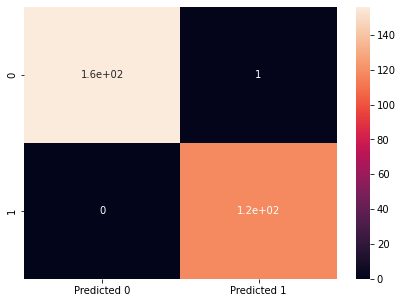

In [ ]:
# from sklearn import metrics

cm = metrics.confusion_matrix(y_test, rfc_classifier_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in [0,1]], columns=[i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

### **KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV

param_grid = {'leaf_size': [2,5,7,9,11], 'n_neighbors': [2,5,7,9,11], 'p': [1,2]}

grid=GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)

grid.fit(X_train, y_train)

<IPython.core.display.Javascript object>

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [ ]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [ ]:
grid.best_score_

0.9981818181818183

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=2, p=1, leaf_size=2)

In [ ]:
#call KNeighbors algorithm

KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [ ]:
KNN_pred = KNN.predict(X_test)
KNN_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

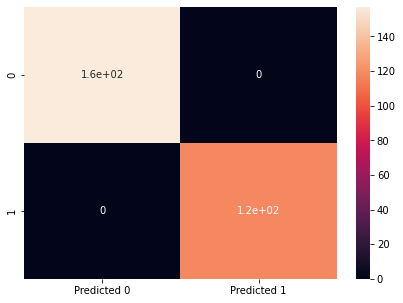

In [ ]:
# from sklearn import metrics

cm = metrics.confusion_matrix(y_test, KNN_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in [0,1]], columns=[i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True);

In [ ]:
KNN_accuracies = cross_val_score(estimator=KNN, X=X_train, y=y_train, cv=10)
print("Accuracies:\n", KNN_accuracies)

<IPython.core.display.Javascript object>

Accuracies:
 [0.99090909 0.99090909 0.99090909 1.         1.         1.
 1.         1.         1.         1.        ]


In [ ]:
print("Mean Accuracy:", KNN_accuracies.mean())

Mean Accuracy: 0.9972727272727273


## **Multilayer Perception** :- Neural Network

Till here I don't an idea that what **Neural Network's** is..............

In [ ]:
from sklearn.neural_network import MLPClassifier

multi_classifier = MLPClassifier(hidden_layer_sizes=(8,4), max_iter=8000, alpha=0.0001, solver='sgd', verbose=10, random_state=21, tol=0.000000001)
multi_classifier.fit(X_train, y_train)

Iteration 1, loss = 1.02065261
Iteration 2, loss = 1.00232763
Iteration 3, loss = 0.97715486
Iteration 4, loss = 0.94973488
Iteration 5, loss = 0.92231418
Iteration 6, loss = 0.89651964
Iteration 7, loss = 0.87283524
Iteration 8, loss = 0.85051410
Iteration 9, loss = 0.83056223
Iteration 10, loss = 0.81132826
Iteration 11, loss = 0.79467501
Iteration 12, loss = 0.77862224
Iteration 13, loss = 0.76455037
Iteration 14, loss = 0.75105250
Iteration 15, loss = 0.73882781
Iteration 16, loss = 0.72727541
Iteration 17, loss = 0.71657090
Iteration 18, loss = 0.70615519
Iteration 19, loss = 0.69650376
Iteration 20, loss = 0.68705241
Iteration 21, loss = 0.67795411
Iteration 22, loss = 0.66915932
Iteration 23, loss = 0.66056959
Iteration 24, loss = 0.65225336
Iteration 25, loss = 0.64391579
Iteration 26, loss = 0.63595619
Iteration 27, loss = 0.62803230
Iteration 28, loss = 0.62041858
Iteration 29, loss = 0.61270498
Iteration 30, loss = 0.60516212
Iteration 31, loss = 0.59779594
Iteration 32, los

C:\Users\frank\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=8000, random_state=21,
              solver='sgd', tol=1e-09, verbose=10)

In [ ]:
multi_pred = multi_classifier.predict(X_test)

In [ ]:
multi_accuracies = cross_val_score(estimator=multi_classifier, X=X_train, y=y_train,cv=10)

print("Accuracies:\n",multi_accuracies)

<IPython.core.display.Javascript object>

Iteration 1, loss = 1.01992022
Iteration 2, loss = 1.00614709
Iteration 3, loss = 0.98582893
Iteration 4, loss = 0.96359974
Iteration 5, loss = 0.94067904
Iteration 6, loss = 0.91813751
Iteration 7, loss = 0.89650612
Iteration 8, loss = 0.87687780
Iteration 9, loss = 0.85725965
Iteration 10, loss = 0.84020970
Iteration 11, loss = 0.82388931
Iteration 12, loss = 0.80877406
Iteration 13, loss = 0.79484356
Iteration 14, loss = 0.78172629
Iteration 15, loss = 0.76964613
Iteration 16, loss = 0.75813416
Iteration 17, loss = 0.74773307
Iteration 18, loss = 0.73751903
Iteration 19, loss = 0.72813163
Iteration 20, loss = 0.71923396
Iteration 21, loss = 0.71067677
Iteration 22, loss = 0.70244578
Iteration 23, loss = 0.69449592
Iteration 24, loss = 0.68688213
Iteration 25, loss = 0.67942532
Iteration 26, loss = 0.67213834
Iteration 27, loss = 0.66503769
Iteration 28, loss = 0.65796333
Iteration 29, loss = 0.65116831
Iteration 30, loss = 0.64447280
Iteration 31, loss = 0.63780231
Iteration 32, los

C:\Users\frank\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 78, loss = 0.38014277
Iteration 79, loss = 0.37507480
Iteration 80, loss = 0.37007154
Iteration 81, loss = 0.36508145
Iteration 82, loss = 0.36010632
Iteration 83, loss = 0.35519689
Iteration 84, loss = 0.35023675
Iteration 85, loss = 0.34534651
Iteration 86, loss = 0.34043997
Iteration 87, loss = 0.33556904
Iteration 88, loss = 0.33073816
Iteration 89, loss = 0.32595785
Iteration 90, loss = 0.32120032
Iteration 91, loss = 0.31641592
Iteration 92, loss = 0.31168221
Iteration 93, loss = 0.30698414
Iteration 94, loss = 0.30239754
Iteration 95, loss = 0.29775988
Iteration 96, loss = 0.29319687
Iteration 97, loss = 0.28867904
Iteration 98, loss = 0.28424834
Iteration 99, loss = 0.27981384
Iteration 100, loss = 0.27547055
Iteration 101, loss = 0.27115469
Iteration 102, loss = 0.26694130
Iteration 103, loss = 0.26275829
Iteration 104, loss = 0.25862354
Iteration 105, loss = 0.25455354
Iteration 106, loss = 0.25054968
Iteration 107, loss = 0.24662368
Iteration 108, loss = 0.24276773

C:\Users\frank\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.83982065
Iteration 11, loss = 0.82358728
Iteration 12, loss = 0.80840669
Iteration 13, loss = 0.79441778
Iteration 14, loss = 0.78117031
Iteration 15, loss = 0.76924072
Iteration 16, loss = 0.75766249
Iteration 17, loss = 0.74705930
Iteration 18, loss = 0.73700068
Iteration 19, loss = 0.72744037
Iteration 20, loss = 0.71842745
Iteration 21, loss = 0.70967947
Iteration 22, loss = 0.70149245
Iteration 23, loss = 0.69346794
Iteration 24, loss = 0.68571344
Iteration 25, loss = 0.67814458
Iteration 26, loss = 0.67083942
Iteration 27, loss = 0.66353900
Iteration 28, loss = 0.65651519
Iteration 29, loss = 0.64956566
Iteration 30, loss = 0.64282991
Iteration 31, loss = 0.63619906
Iteration 32, loss = 0.62972739
Iteration 33, loss = 0.62312645
Iteration 34, loss = 0.61663837
Iteration 35, loss = 0.61025498
Iteration 36, loss = 0.60416636
Iteration 37, loss = 0.59792828
Iteration 38, loss = 0.59173170
Iteration 39, loss = 0.58564650
Iteration 40, loss = 0.57967527
Iteratio

C:\Users\frank\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.72817413
Iteration 20, loss = 0.71913194
Iteration 21, loss = 0.71041141
Iteration 22, loss = 0.70229798
Iteration 23, loss = 0.69427548
Iteration 24, loss = 0.68647294
Iteration 25, loss = 0.67901788
Iteration 26, loss = 0.67167807
Iteration 27, loss = 0.66438871
Iteration 28, loss = 0.65746825
Iteration 29, loss = 0.65055362
Iteration 30, loss = 0.64378771
Iteration 31, loss = 0.63726839
Iteration 32, loss = 0.63076506
Iteration 33, loss = 0.62428152
Iteration 34, loss = 0.61781500
Iteration 35, loss = 0.61146749
Iteration 36, loss = 0.60537500
Iteration 37, loss = 0.59922542
Iteration 38, loss = 0.59299940
Iteration 39, loss = 0.58697600
Iteration 40, loss = 0.58104569
Iteration 41, loss = 0.57527827
Iteration 42, loss = 0.56950112
Iteration 43, loss = 0.56377548
Iteration 44, loss = 0.55804397
Iteration 45, loss = 0.55242379
Iteration 46, loss = 0.54696267
Iteration 47, loss = 0.54138272
Iteration 48, loss = 0.53592781
Iteration 49, loss = 0.53054585
Iteratio

C:\Users\frank\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 0.54110392
Iteration 48, loss = 0.53560305
Iteration 49, loss = 0.53023362
Iteration 50, loss = 0.52484289
Iteration 51, loss = 0.51950220
Iteration 52, loss = 0.51425288
Iteration 53, loss = 0.50897675
Iteration 54, loss = 0.50368187
Iteration 55, loss = 0.49854362
Iteration 56, loss = 0.49324865
Iteration 57, loss = 0.48801806
Iteration 58, loss = 0.48276318
Iteration 59, loss = 0.47763029
Iteration 60, loss = 0.47244684
Iteration 61, loss = 0.46729635
Iteration 62, loss = 0.46212906
Iteration 63, loss = 0.45693459
Iteration 64, loss = 0.45183846
Iteration 65, loss = 0.44664386
Iteration 66, loss = 0.44157292
Iteration 67, loss = 0.43640787
Iteration 68, loss = 0.43130418
Iteration 69, loss = 0.42618447
Iteration 70, loss = 0.42106806
Iteration 71, loss = 0.41591066
Iteration 72, loss = 0.41082258
Iteration 73, loss = 0.40578069
Iteration 74, loss = 0.40066815
Iteration 75, loss = 0.39560690
Iteration 76, loss = 0.39057801
Iteration 77, loss = 0.38551916
Iteratio

C:\Users\frank\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 0.57125584
Iteration 42, loss = 0.56541247
Iteration 43, loss = 0.55964915
Iteration 44, loss = 0.55397028
Iteration 45, loss = 0.54832063
Iteration 46, loss = 0.54282986
Iteration 47, loss = 0.53721450
Iteration 48, loss = 0.53164460
Iteration 49, loss = 0.52620644
Iteration 50, loss = 0.52076994
Iteration 51, loss = 0.51541548
Iteration 52, loss = 0.51012206
Iteration 53, loss = 0.50483901
Iteration 54, loss = 0.49957224
Iteration 55, loss = 0.49443679
Iteration 56, loss = 0.48914877
Iteration 57, loss = 0.48395804
Iteration 58, loss = 0.47870932
Iteration 59, loss = 0.47357416
Iteration 60, loss = 0.46842922
Iteration 61, loss = 0.46329072
Iteration 62, loss = 0.45819757
Iteration 63, loss = 0.45301733
Iteration 64, loss = 0.44797080
Iteration 65, loss = 0.44283654
Iteration 66, loss = 0.43780599
Iteration 67, loss = 0.43266592
Iteration 68, loss = 0.42758851
Iteration 69, loss = 0.42252280
Iteration 70, loss = 0.41745590
Iteration 71, loss = 0.41235288
Iteratio

C:\Users\frank\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.76839409
Iteration 16, loss = 0.75681543
Iteration 17, loss = 0.74615392
Iteration 18, loss = 0.73624215
Iteration 19, loss = 0.72630950
Iteration 20, loss = 0.71718151
Iteration 21, loss = 0.70845503
Iteration 22, loss = 0.70016874
Iteration 23, loss = 0.69217166
Iteration 24, loss = 0.68427466
Iteration 25, loss = 0.67666590
Iteration 26, loss = 0.66926844
Iteration 27, loss = 0.66190295
Iteration 28, loss = 0.65472207
Iteration 29, loss = 0.64777463
Iteration 30, loss = 0.64096286
Iteration 31, loss = 0.63431957
Iteration 32, loss = 0.62756048
Iteration 33, loss = 0.62108491
Iteration 34, loss = 0.61452450
Iteration 35, loss = 0.60818987
Iteration 36, loss = 0.60199477
Iteration 37, loss = 0.59574227
Iteration 38, loss = 0.58940178
Iteration 39, loss = 0.58339686
Iteration 40, loss = 0.57739540
Iteration 41, loss = 0.57149332
Iteration 42, loss = 0.56561529
Iteration 43, loss = 0.55981505
Iteration 44, loss = 0.55407476
Iteration 45, loss = 0.54839161
Iteratio

C:\Users\frank\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.99218238
Iteration 4, loss = 0.96864555
Iteration 5, loss = 0.94633724
Iteration 6, loss = 0.92312570
Iteration 7, loss = 0.90115053
Iteration 8, loss = 0.88101523
Iteration 9, loss = 0.86179245
Iteration 10, loss = 0.84390238
Iteration 11, loss = 0.82741223
Iteration 12, loss = 0.81196333
Iteration 13, loss = 0.79731720
Iteration 14, loss = 0.78433167
Iteration 15, loss = 0.77207650
Iteration 16, loss = 0.76052566
Iteration 17, loss = 0.74974953
Iteration 18, loss = 0.73953560
Iteration 19, loss = 0.72982445
Iteration 20, loss = 0.72082210
Iteration 21, loss = 0.71204934
Iteration 22, loss = 0.70361018
Iteration 23, loss = 0.69546955
Iteration 24, loss = 0.68779417
Iteration 25, loss = 0.68003586
Iteration 26, loss = 0.67272023
Iteration 27, loss = 0.66555875
Iteration 28, loss = 0.65841186
Iteration 29, loss = 0.65139615
Iteration 30, loss = 0.64461798
Iteration 31, loss = 0.63802549
Iteration 32, loss = 0.63145624
Iteration 33, loss = 0.62484754
Iteration 34, l

C:\Users\frank\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.45332070
Iteration 64, loss = 0.44812908
Iteration 65, loss = 0.44293299
Iteration 66, loss = 0.43775083
Iteration 67, loss = 0.43254896
Iteration 68, loss = 0.42737628
Iteration 69, loss = 0.42218578
Iteration 70, loss = 0.41698911
Iteration 71, loss = 0.41187121
Iteration 72, loss = 0.40670848
Iteration 73, loss = 0.40156332
Iteration 74, loss = 0.39641210
Iteration 75, loss = 0.39133801
Iteration 76, loss = 0.38619714
Iteration 77, loss = 0.38111288
Iteration 78, loss = 0.37603525
Iteration 79, loss = 0.37100749
Iteration 80, loss = 0.36595013
Iteration 81, loss = 0.36089809
Iteration 82, loss = 0.35588051
Iteration 83, loss = 0.35092727
Iteration 84, loss = 0.34596895
Iteration 85, loss = 0.34097567
Iteration 86, loss = 0.33608093
Iteration 87, loss = 0.33121983
Iteration 88, loss = 0.32632273
Iteration 89, loss = 0.32153269
Iteration 90, loss = 0.31672620
Iteration 91, loss = 0.31196361
Iteration 92, loss = 0.30725971
Iteration 93, loss = 0.30253851
Iteratio

C:\Users\frank\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, loss = 0.46591496
Iteration 62, loss = 0.46088194
Iteration 63, loss = 0.45577475
Iteration 64, loss = 0.45065937
Iteration 65, loss = 0.44563867
Iteration 66, loss = 0.44054588
Iteration 67, loss = 0.43548652
Iteration 68, loss = 0.43045556
Iteration 69, loss = 0.42537308
Iteration 70, loss = 0.42030896
Iteration 71, loss = 0.41532559
Iteration 72, loss = 0.41026504
Iteration 73, loss = 0.40523557
Iteration 74, loss = 0.40018402
Iteration 75, loss = 0.39519960
Iteration 76, loss = 0.39016595
Iteration 77, loss = 0.38518037
Iteration 78, loss = 0.38019868
Iteration 79, loss = 0.37523737
Iteration 80, loss = 0.37030075
Iteration 81, loss = 0.36531589
Iteration 82, loss = 0.36038656
Iteration 83, loss = 0.35550249
Iteration 84, loss = 0.35065080
Iteration 85, loss = 0.34571906
Iteration 86, loss = 0.34090236
Iteration 87, loss = 0.33610019
Iteration 88, loss = 0.33129216
Iteration 89, loss = 0.32656165
Iteration 90, loss = 0.32182370
Iteration 91, loss = 0.31709798
Iteratio

C:\Users\frank\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print("Mean Accuracy:", multi_accuracies.mean())

Mean Accuracy: 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

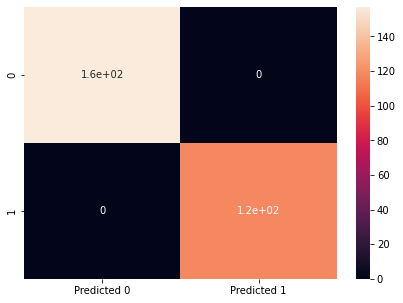

In [ ]:
# from sklearn import metrics

cm = metrics.confusion_matrix(y_test, multi_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in [0,1]], columns=[i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True);

## Printing each Algorithm and the accuracy score

In [ ]:
print('LogisticRegression:', accuracies.mean())
print('Support Vector Machine(kernel=liblinear):', svm_accuracies.mean())
print('Support Vector Machine(kernel=rbf): {}%'.format(100))
print('RandomForestClassifier:', rfc_accuracies.mean())
print('KNeighborsClassifier:', KNN_accuracies.mean())
print('Multilayer Perception: {}%'.format(100))


LogisticRegression: 0.9835863219349459
Support Vector Machine(kernel=liblinear): 0.9854045037531277
Support Vector Machine(kernel=rbf): 100%
RandomForestClassifier: 0.9954545454545455
KNeighborsClassifier: 0.9972727272727273
Multilayer Perception: 100%
